# Machine Learning Models

In [1]:
# importing the libraries
from utils.DataIngestion import get_path
from utils.ModelFunctions import rmse_cv

import os
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# getting the path
path = get_path()
print(f"Path: {path}")

Path: D:\Machine Learning\MACHINE LEARNING PROJECTS\airbnb_price_prediction\data


## Without using Neighbourhood Feature

In [3]:
# loading the data:
df = pd.read_pickle(os.path.join(path, "final_without_neighbourhood.pkl"))
print(f"Shape of the Data: {df.shape}")
df.head()

Shape of the Data: (44977, 14)


,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,0,1,0,0,0,0,1,0,-0.568515,-0.332158,-0.558263,-0.010976,1.971470,149
1,0,0,1,0,0,1,0,0,-0.568515,0.459877,-0.452854,-0.145030,1.894569,225
2,0,0,1,0,0,0,1,0,-0.335855,-0.530167,-0.688475,-0.178543,1.971470,150
3,0,1,0,0,0,1,0,0,-0.568515,5.410101,2.188590,-0.178543,0.656467,89
4,0,0,1,0,0,1,0,0,0.478453,-0.332158,-0.626470,-0.178543,-0.835408,80


### Train, Validation and Test Splits

In [4]:
# dependent and independent features
X = df.drop(['price'], axis=1)
y = df['price']

In [5]:
X.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,1,0,0,0,0,1,0,-0.568515,-0.332158,-0.558263,-0.010976,1.971470
1,0,0,1,0,0,1,0,0,-0.568515,0.459877,-0.452854,-0.145030,1.894569
2,0,0,1,0,0,0,1,0,-0.335855,-0.530167,-0.688475,-0.178543,1.971470
3,0,1,0,0,0,1,0,0,-0.568515,5.410101,2.188590,-0.178543,0.656467
4,0,0,1,0,0,1,0,0,0.478453,-0.332158,-0.626470,-0.178543,-0.835408


In [6]:
y.head()

0    149
1    225
2    150
3     89
4     80
Name: price, dtype: int64

In [7]:
# splitting into the train, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (35981, 13), (35981,)
Test set: (8996, 13), (8996,)


In [141]:
# df_metrics = pd.DataFrame(columns=['model', 'test_mse', 'test_r2_score'])
df_metrics = pd.read_csv("model_metrics.csv")
df_metrics.head()

,model,test_mse,test_r2_score
0,Linear Regression,2135.265736,0.462596
1,Ridge Regression,2136.151579,0.462373
2,Lasso Regression,2136.096459,0.462387
3,RandomForest Regressor,1996.214587,0.497592


### Linear Regression

In [10]:
lr_model = LinearRegression().fit(X_train, y_train)

In [11]:
# predicting 
y_preds = lr_model.predict(X_test)

In [12]:
# getting the scores:
mse_lr = mean_squared_error(y_test, y_preds)
r2_lr = r2_score(y_test, y_preds)
print(f"MSE: {mse_lr}")
print(f"R2 Score: {r2_lr}")

MSE: 2135.265735988354
R2 Score: 0.4625958467705763


In [13]:
# adding to the metrics df:
df_metrics.loc[0] = ['Linear Regression', mse_lr, r2_lr]

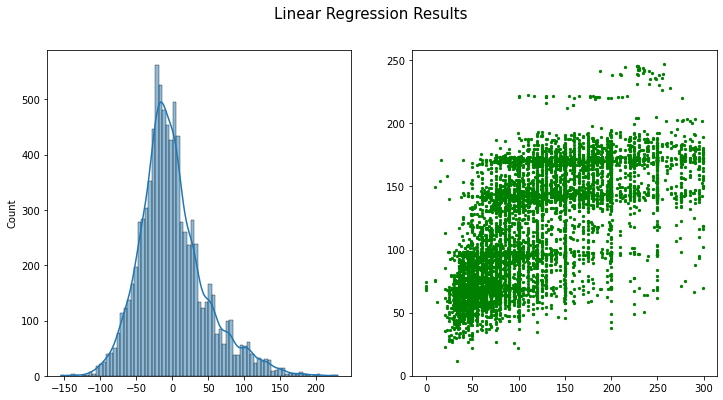

In [14]:
# visualizing the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(y_test.values - y_preds, ax=ax[0], kde=True)
ax[1].scatter(y_test, y_preds, s=5, color='green')
fig.suptitle("Linear Regression Results", fontsize=15)
plt.show();

### Ridge Regression

In [94]:
# cross validation for ridge regression
alphas = [100, 150, 200, 300, 500]
ridge_errors = [-rmse_cv(Ridge(alpha = alpha), X_train, y_train).mean() for alpha in alphas]

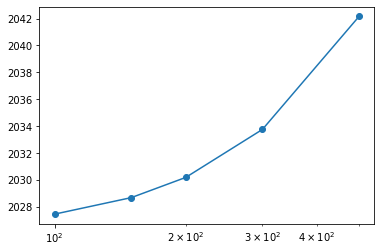

In [95]:
plt.figure()
plt.plot(alphas, ridge_errors, 'o-')
plt.xscale('log')
plt.show();

In [96]:
# getting the best value of alpha
best_alpha = alphas[np.argmin(ridge_errors)]
print(f"Best Alpha value: {best_alpha}")

Best Alpha value: 100


In [98]:
# fitting the model with best alpha value
rr_model = Ridge(alpha=best_alpha).fit(X_train, y_train)

In [99]:
# predicting 
y_pred = rr_model.predict(X_test)

In [100]:
# getting the scores
mse_rr = mean_squared_error(y_test, y_pred)
r2_rr = r2_score(y_test, y_pred)
print(f"MSE: {mse_rr}")
print(f"R2 Score: {r2_rr}")

MSE: 2135.6163270524235
R2 Score: 0.4625076099339426


In [101]:
# adding metrics to df
df_metrics.loc[1] = ['Ridge Regression', mse_rr, r2_rr]

### Lasso Regression

In [102]:
# cross validation for Lasso Regression
alphas = [0.005,0.01, 0.05, 0.1, 0.3, 1]
lasso_errors = [-rmse_cv(Lasso(alpha=alpha, max_iter=3000), X_train, y_train).mean() for alpha in alphas]

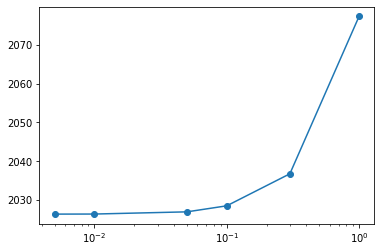

In [105]:
plt.figure()
plt.plot(alphas, lasso_errors, 'o-')
plt.xscale('log')
plt.show();

In [106]:
# best alpha
best_alpha = alphas[np.argmin(lasso_errors)]
print(f"Best Alpha: {best_alpha}")

Best Alpha: 0.005


In [107]:
# fitting the model with best alpha
lasso_model = Lasso(alpha=best_alpha).fit(X_train, y_train)

In [108]:
# predicting
y_pred = lasso_model.predict(X_test)

In [110]:
# getting the scores
mse_lasso = mean_squared_error(y_test, y_pred)
r2_lasso = r2_score(y_test, y_pred)
print(f"MSE: {mse_lasso}")
print(f"R2 Score: {r2_lasso}")

MSE: 2136.096458999271
R2 Score: 0.462386770219248


In [113]:
# adding metrics to df
df_metrics.loc[2] = ['Lasso Regression', mse_lasso, r2_lasso]

In [115]:
# comparing results of OLS, Ridge and Lasso
df_metrics.head(3)

,model,test_mse,test_r2_score
0,Linear Regression,2135.265736,0.462596
1,Ridge Regression,2136.151579,0.462373
2,Lasso Regression,2136.096459,0.462387


### Random Forest Regressor

In [116]:
# RandomForest - Baseline Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 2243.2995427234227
R2 Score: 0.4354058743703788


In [125]:
# hyperparameter tuning
estimator = RandomForestRegressor(random_state=42)

n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 100, 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_distribution = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

pprint(params_distribution)

{'max_depth': [5, 14, 24, 33, 43, 52, 62, 71, 81, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [127]:
# RandomizedSearchCV
rf_model_random = RandomizedSearchCV(estimator=estimator, param_distributions=params_distribution,
                                    n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=2)
rf_model_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=2,
                   param_distributions={'max_depth': [5, 14, 24, 33, 43, 52, 62,
                                                      71, 81, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [128]:
# getting the best RandomForest Model
print(f"Best Parameters: {rf_model_random.best_params_}")
print(f"Best Estimator: {rf_model_random.best_estimator_}")

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 14}
Best Estimator: RandomForestRegressor(max_depth=14, max_features='sqrt', min_samples_leaf=4,
                      n_estimators=200, random_state=42)


In [129]:
best_random = rf_model_random.best_estimator_

In [130]:
# fitting and predicting
best_random.fit(X_train, y_train)

y_pred = best_random.predict(X_test)

In [131]:
# getting the scores
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
print(f"MSE: {mse_rf}")
print(f"R2 Score: {r2_rf}")

MSE: 1996.2145874933399
R2 Score: 0.49759227061285416


In [132]:
# adding to the df 
df_metrics.loc[3] = ['RandomForest Regressor', mse_rf, r2_rf]

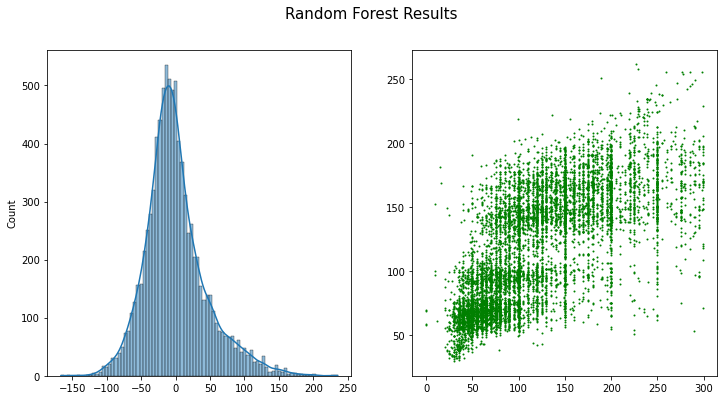

In [139]:
# visualizing the predictions
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(y_test.values - y_pred, kde=True, ax=ax[0])
ax[1].scatter(y_test, y_pred, s=1, color='green')
plt.suptitle("Random Forest Results", fontsize=15)
plt.show();

### XGBoost Regressor

In [142]:
# xgboost - Baseline Model
xgb_model = XGBRegressor(eval_metric=mean_squared_error, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eval_metric=<function mean_squared_error at 0x000001A3B120EF70>,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [143]:
y_pred = xgb_model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 2022.6080250979644
R2 Score: 0.49094956439242143


In [184]:
# hyperparameter tuning using RandomizedSearchCV
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 250, 500, 1000]}
estimator = XGBRegressor(random_state=42)
xgb_model_random = RandomizedSearchCV(estimator=estimator,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=20,
                         cv=5,
                         verbose=1)

xgb_model_random.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=20,
                   param_distribut

In [185]:
# best estimator and params
print(f"Best Estimator: {xgb_model_random.best_estimator_}")
print(f"Best Score: {xgb_model_random.best_score_}")

Best Estimator: XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.7999999999999999, colsample_bynode=1,
             colsample_bytree=0.7999999999999999, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)
Best Score: -1883.3593165609861


In [186]:
best_xgb = xgb_model_random.best_estimator_

In [187]:
# fitting and predicting
best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)

In [189]:
# getting the score
mse_xgb = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)
print(f"MSE: {mse_xgb}")
print(f"R2 Score: {r2_xgb}")

MSE: 1979.384363832277
R2 Score: 0.5018281050304607


In [190]:
# saving to metrics df
df_metrics.loc[4] = ['XGB Regressor', mse_xgb, r2_xgb]

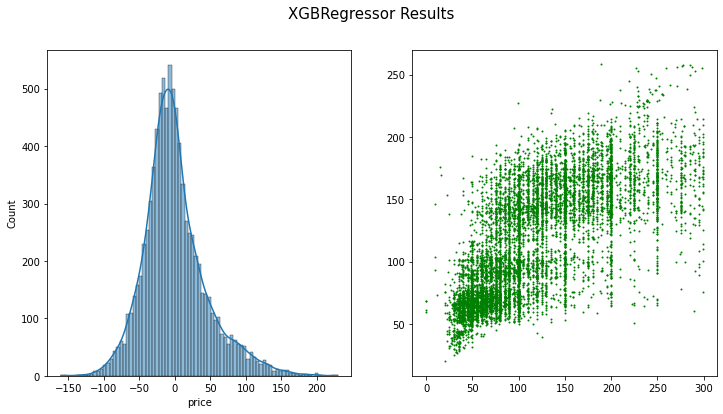

In [192]:
# visualizing the results:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(y_test - y_pred, kde=True, ax=ax[0])
ax[1].scatter(y_test, y_pred, s=1, color='green')
plt.suptitle('XGBRegressor Results', fontsize=15)
plt.show();

In [195]:
# getting the Root Mean Squared Errors:
df_metrics['test_rmse'] = np.sqrt(df_metrics['test_mse'])

In [196]:
df_metrics.head()

,model,test_mse,test_r2_score,test_rmse
0,Linear Regression,2135.265736,0.462596,46.208936
1,Ridge Regression,2136.151579,0.462373,46.218520
2,Lasso Regression,2136.096459,0.462387,46.217924
3,RandomForest Regressor,1996.214587,0.497592,44.679017
4,XGB Regressor,1979.384364,0.501828,44.490273


In [198]:
# saving the metrics:
df_metrics.to_csv("model_metrics.csv", index=False)

## Using Neighbourhood Feature

In [3]:
# importing the data
df = pd.read_pickle(os.path.join(path, "final_with_neighbourhood.pkl"))
df.shape

(44977, 233)

In [4]:
df.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_Allerton,neighbourhood_Arden Heights,...,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,-0.568515,-0.332158,-0.558263,-0.010976,1.971470,149
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,-0.568515,0.459877,-0.452854,-0.145030,1.894569,225
2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,-0.335855,-0.530167,-0.688475,-0.178543,1.971470,150
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,-0.568515,5.410101,2.188590,-0.178543,0.656467,89
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0.478453,-0.332158,-0.626470,-0.178543,-0.835408,80


In [5]:
# splitting into train and test features
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training:", X_train.shape, y_train.shape)
print("Test Set:", X_test.shape, y_test.shape)

Training: (35981, 232) (35981,)
Test Set: (8996, 232) (8996,)


In [6]:
# storing the results in a DataFrame
metrics = pd.DataFrame(columns=['model', 'mse', 'r2_score'])

In [7]:
metrics.head()

,model,mse,r2_score


### Linear Regression

In [8]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [9]:
# getting predictions and scores
y_pred = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print(f"MSE: {mse_lr}")
print(f"R2 Score: {r2_lr}")

MSE: 6.174823314579726e+22
R2 Score: -1.5540808990582331e+19


### Ridge Regression

In [10]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
ridge_errors = [-rmse_cv(Ridge(alpha=alpha), X_train, y_train).mean() for alpha in alphas]

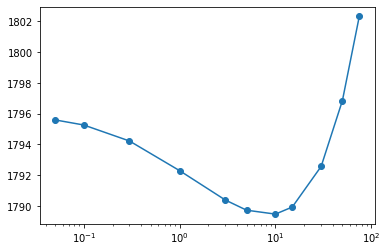

In [11]:
# plotting the results:
plt.figure()
plt.plot(alphas, ridge_errors, 'o-')
plt.xscale('log')
plt.show();

In [12]:
# getting the Alpha and Errors:
pd.DataFrame({'alpha': alphas, 'mse': ridge_errors})

,alpha,mse
0,0.05,1795.599888
1,0.10,1795.266681
2,0.30,1794.226031
3,1.00,1792.298940
4,3.00,1790.389234
5,5.00,1789.727521
6,10.00,1789.472265
7,15.00,1789.934661
8,30.00,1792.573368
9,50.00,1796.852798


In [13]:
# getting a closer look at the alphas:
alphas = [1.5 * i for i in range(2, 10)]
ridge_errors = [-rmse_cv(Ridge(alpha=alpha), X_train, y_train).mean() for alpha in alphas]

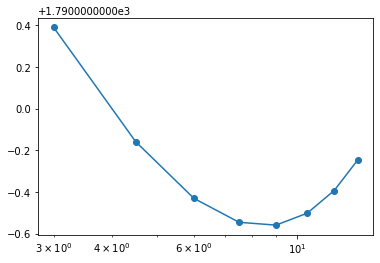

In [14]:
# plotting the results
plt.figure()
plt.plot(alphas, ridge_errors, 'o-')
plt.xscale('log')
plt.show();

In [15]:
# getting the best alpha
best_alpha = alphas[np.argmin(ridge_errors)]
print(f"Best Alpha value: {best_alpha}")

Best Alpha value: 9.0


In [16]:
rr_model = Ridge(alpha=best_alpha)
rr_model.fit(X_train, y_train)

Ridge(alpha=9.0)

In [17]:
# getting predictions and scores
y_pred = rr_model.predict(X_test)
mse_rr = mean_squared_error(y_test, y_pred)
r2_rr = r2_score(y_test, y_pred)

print(f"MSE: {mse_rr}")
print(f"R2 score: {r2_rr}")

MSE: 1866.2714232559415
R2 score: 0.5302963949604628


In [18]:
# storing the metrics in the df
metrics.loc[0] = ['RidgeRegression', mse_rr, r2_rr]

### Lasso Regression

In [19]:
alphas = [0.0005, 0.005,0.01, 0.05, 0.1, 0.3, 1]
lasso_errors = [-rmse_cv(Lasso(alpha=alpha, max_iter=3000), X_train, y_train).mean() for alpha in alphas]

d:\machine learning\machine learning projects\airbnb_price_prediction\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.997e+06, tolerance: 1.142e+04
  model = cd_fast.enet_coordinate_descent(
d:\machine learning\machine learning projects\airbnb_price_prediction\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.088e+06, tolerance: 1.149e+04
  model = cd_fast.enet_coordinate_descent(
d:\machine learning\machine learning projects\airbnb_price_prediction\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You mi

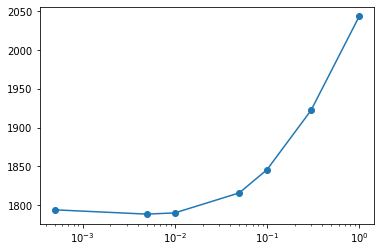

In [20]:
# plotting alpha vs error
plt.figure()
plt.plot(alphas, lasso_errors, 'o-')
plt.xscale('log')
plt.show();

In [21]:
pd.DataFrame({'alphas': alphas, 'mse': lasso_errors})

,alphas,mse
0,0.0005,1794.008972
1,0.0050,1788.479506
2,0.0100,1790.045842
3,0.0500,1815.767468
4,0.1000,1845.655618
5,0.3000,1921.938032
6,1.0000,2043.069701


In [22]:
# best alpha
best_alpha = alphas[np.argmin(lasso_errors)]
print(f"Best Alpha value: {best_alpha}")

Best Alpha value: 0.005


In [23]:
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, y_train)

d:\machine learning\machine learning projects\airbnb_price_prediction\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.404e+05, tolerance: 1.433e+04
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.005)

In [24]:
# getting predictions and scores
y_pred = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred)
r2_lasso = r2_score(y_test, y_pred)

print(f"MSE: {mse_lasso}")
print(f"R2 Score: {r2_lasso}")

MSE: 1866.7637756774716
R2 Score: 0.5301724795939942


In [25]:
# storing the metrics
metrics.loc[1] = ['LassoRegression', mse_lasso, r2_lasso]

### Random Forest Regressor

In [26]:
# randomforest - baseline model
rf_baseline = RandomForestRegressor()
rf_baseline.fit(X_train, y_train)

y_pred = rf_baseline.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 score: {r2_score(y_test, y_pred)}")

MSE: 1850.1848754106688
R2 score: 0.5343450608840846


In [28]:
# hyperparameter tuning
estimator = RandomForestRegressor(random_state=42)

n_estimators = [int(x) for x in np.linspace(200, 2000, 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 100, 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_distribution = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

pprint(params_distribution)

{'max_depth': [5, 14, 24, 33, 43, 52, 62, 71, 81, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [30]:
# randomized search
rf_model_random = RandomizedSearchCV(estimator=estimator,
                                    param_distributions=params_distribution,
                                    cv=3, n_iter=10,
                                    verbose=1, random_state=42,
                                    n_jobs=2)
rf_model_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=2,
                   param_distributions={'max_depth': [5, 14, 24, 33, 43, 52, 62,
                                                      71, 81, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [31]:
# best model and params:
print(f"Best Estimator: {rf_model_random.best_estimator_}")
print(f"Best Score: {rf_model_random.best_score_}")

Best Estimator: RandomForestRegressor(max_depth=24, max_features='sqrt', min_samples_split=5,
                      n_estimators=1400, random_state=42)
Best Score: 0.5702698169379242


In [32]:
# training the best random forest model
rf_model = rf_model_random.best_estimator_
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=24, max_features='sqrt', min_samples_split=5,
                      n_estimators=1400, random_state=42)

In [33]:
# getting predictions and scores
y_pred = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print(f"MSE: {mse_rf}")
print(f"R2 Score: {r2_rf}")

MSE: 1770.2319733522904
R2 Score: 0.5544676249775087


In [35]:
# storing the results in df
metrics.loc[2] = ['RandomForestRegressor', mse_rf, r2_rf]

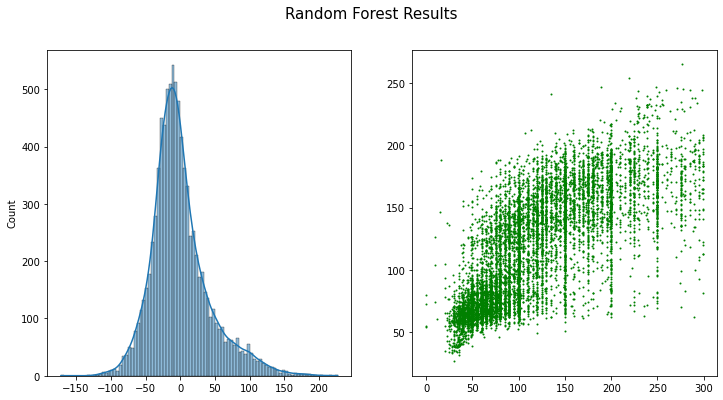

In [36]:
# visualizing the predictions
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(y_test.values - y_pred, kde=True, ax=ax[0])
ax[1].scatter(y_test, y_pred, s=1, color='green')
plt.suptitle("Random Forest Results", fontsize=15)
plt.show();

### XGBRegressor

In [39]:
# xgbregressor - baseline model
xgb_model = XGBRegressor(eval_metric=mean_squared_error, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 1732.800691954044
R2 Score: 0.5638883381679471


In [40]:
# randomized search
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 250, 500, 1000]}
estimator = XGBRegressor(random_state=42)
xgb_model_random = RandomizedSearchCV(estimator=estimator,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=20,
                         cv=3, n_jobs=-1,
                         verbose=1)

xgb_model_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=20, n_jobs=-1,
                   para

In [41]:
print(f"Best Estimator: {xgb_model_random.best_estimator_}")
print(f"Best Score: {xgb_model_random.best_score_}")

Best Estimator: XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.7999999999999999, colsample_bynode=1,
             colsample_bytree=0.4, enable_categorical=False, gamma=0, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, predictor='auto',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.7999999999999999, tree_method='exact',
             validate_parameters=1, verbosity=None)
Best Score: -1647.6817539824472


In [42]:
# best model:
xgb_model = xgb_model_random.best_estimator_
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.7999999999999999, colsample_bynode=1,
             colsample_bytree=0.4, enable_categorical=False, gamma=0, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, predictor='auto',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.7999999999999999, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [43]:
# predictions and scores
y_pred = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)

print(f"MSE: {mse_xgb}")
print(f"R2 Score: {r2_xgb}")

MSE: 1689.9346316782335
R2 Score: 0.5746768777096734


In [44]:
# saving metrics to df
metrics.loc[3] = ['XGBRegressor', mse_xgb, r2_xgb]

In [45]:
# looking at the metrics
metrics.head()

,model,mse,r2_score
0,RidgeRegression,1866.271423,0.530296
1,LassoRegression,1866.763776,0.530172
2,RandomForestRegressor,1770.231973,0.554468
3,XGBRegressor,1689.934632,0.574677


In [46]:
metrics.to_csv("metrics_with_all_features.csv", index=False)